C:\Users\atres\AppData\Local\Temp\ipykernel_2700\1186738802.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


          Country     Revenue
0   United States  68980000.0
1          Canada  18040000.0
2  United Kingdom   6800000.0
3          France   6650000.0
4       Australia   6420000.0
5         Germany   5900000.0


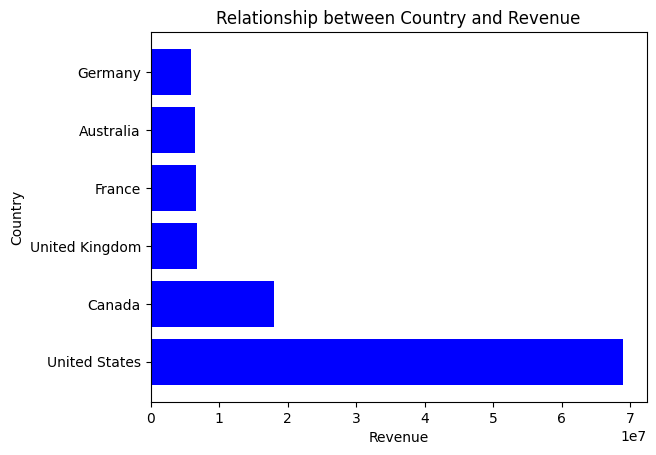

In [32]:
import pyodbc
import pandas as pd
from matplotlib import pyplot as plt
 
# Establish connection to the AdventureWorks2022 database using pyodbc
connection = pyodbc.connect(
    r'DRIVER={ODBC Driver 17 for SQL Server};'  # Specifies the ODBC driver to use
    r'SERVER=DESKTOP-G1HPGDT\SQLEXPRESS;'       # Specifies the SQL Server instance
    r'DATABASE=AdventureWorks2022;'            # Specifies the database name
    r'Trusted_Connection=yes;'                 # Enables Windows Authentication
    r'TrustServerCertificate=yes;'             # Allows untrusted certificates (use carefully in production)
)
 
# Define the SQL query to retrieve country and revenue data
# The query sums up the AnnualRevenue for each CountryRegionName and orders the result in descending order of revenue
query = """ 
SELECT SD.CountryRegionName as Country, SUM(SW.AnnualRevenue) AS Revenue
FROM Sales.vStoreWithAddresses as SD
JOIN Sales.vStoreWithDemographics as SW
ON SD.BusinessEntityID=SW.BusinessEntityID
GROUP BY CountryRegionName
ORDER BY Revenue DESC;
"""
 
# Execute the query and load the result into a Pandas DataFrame
df = pd.read_sql(query, connection)
print(df)  # Print the DataFrame to verify the data
 
# Create a horizontal bar chart to visualize the relationship between Country and Revenue
plt.barh(df['Country'], df['Revenue'], color='blue')  # Plot the data with blue bars
plt.title("Relationship between Country and Revenue")  # Add a title to the chart
plt.ylabel("Country")  # Label the Y-axis
plt.xlabel("Revenue")  # Label the X-axis
plt.show()  # Display the chart
 
# Close the connection to the database
connection.close()